<a href="https://colab.research.google.com/github/KoushaAm/MachineLearning/blob/main/RegressionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regression Project

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
x = data['citric acid']
y = data['pH']

len(x)

1143

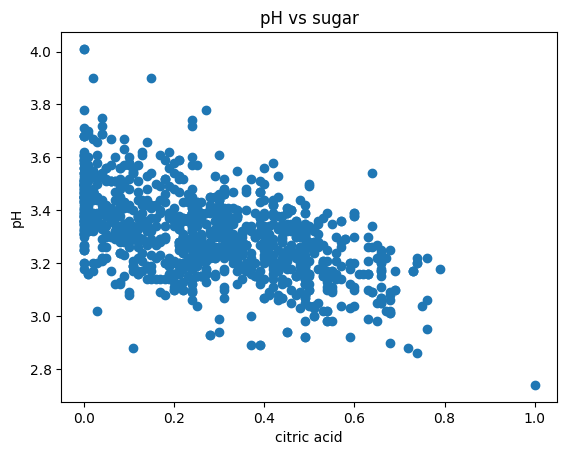

In [ ]:
plt.scatter(x,y)

plt.xlabel("citric acid")
plt.ylabel("pH")
plt.title("pH vs sugar")


plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


#initilize the x y train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state=42)


In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model1.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae'])


history = model1.fit(x_train, y_train, epochs = 200, verbose = 0 )


In [ ]:
test1 = model1.evaluate(x_test, y_test)

26/26 [==============================] - 0s 3ms/step - loss: 0.1105 - mae: 0.1105


Text(0.5, 0, 'epoch')

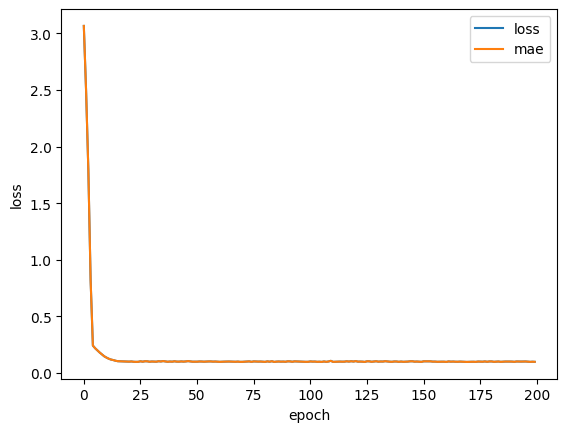

In [ ]:
pd.DataFrame(history.history).plot()

plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
# model 2 additional layer and Adam optimizer

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['mae'])

progression = model2.fit(x_train, y_train, epochs = 100)


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 3.1178 - mae: 3.1178
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 2.6361 - mae: 2.6361
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 1.9617 - mae: 1.9617
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 1.0920 - mae: 1.0920
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8723 - mae: 0.8723
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7591 - mae: 0.7591
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6511 - mae: 0.6511
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5413 - mae: 0.5413
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4277 - mae: 0.4277
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3078 - mae: 0.3078
Epoch 11/100
11/11 [==============================] - 0s 3m

In [ ]:
test2 = model2.evaluate(x_test, y_test)
test2

26/26 [==============================] - 0s 2ms/step - loss: 0.1033 - mae: 0.1033


[0.10331585258245468, 0.10331585258245468]

Text(0.5, 0, 'epoch')

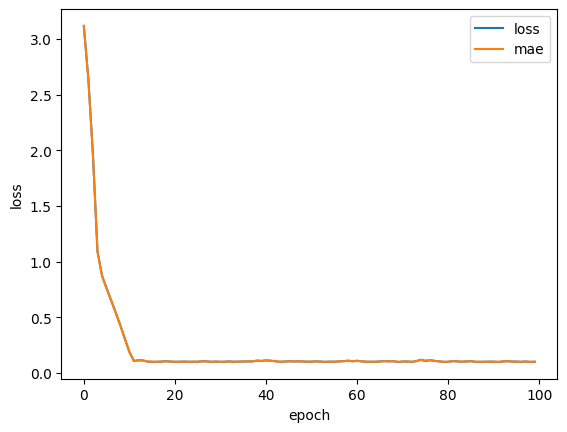

In [ ]:
pd.DataFrame(progression.history).plot()

plt.ylabel('loss')
plt.xlabel('epoch')